In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df1=df.reset_index()['high']

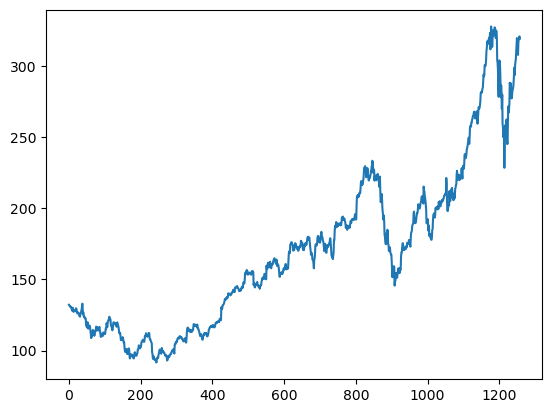

In [4]:
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [7]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-07-31 16:52:20.571333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2023-07-31 16:52:24.874045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 195ms/step - loss: 0.0163 - val_loss: 0.0497
Epoch 2/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 1s 123ms/step - loss: 8.3088e-04 - val_loss: 0.0052
Epoch 4/100
12/12 [==============================] - 1s 122ms/step - loss: 6.7589e-04 - val_loss: 0.0034
Epoch 5/100
12/12 [==============================] - 1s 125ms/step - loss: 5.9290e-04 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 1s 124ms/step - loss: 5.4500e-04 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 1s 125ms/step - loss: 5.3433e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 1s 121ms/step - loss: 5.3126e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 1s 121ms/step - loss: 5.2369e-04 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 1s 125ms/

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.14350548939328

In [20]:
math.sqrt(mean_squared_error(ytest,test_predict))

238.66863496917125

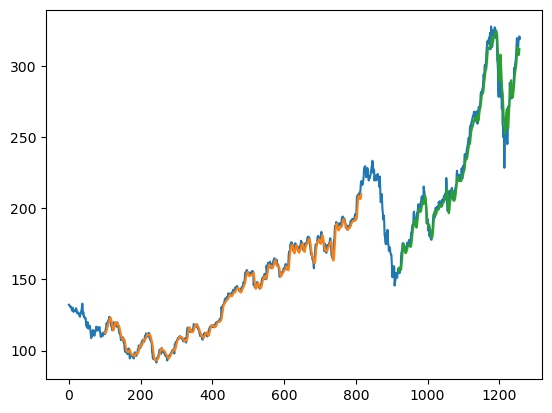

In [21]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [23]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
temp_input

[0.855322211872301,
 0.8846218985519521,
 0.8845372173765771,
 0.8819121009399611,
 0.8858921161825726,
 0.9008802608180202,
 0.9262426962486241,
 0.935726987890592,
 0.954356846473029,
 0.956473875857397,
 0.947709374206114,
 0.948556185959861,
 0.9614277246168177,
 0.9626132610720637,
 0.9667202980777374,
 0.9648996528071809,
 0.9808620543653146,
 0.9319163349987298,
 0.9599881446354475,
 1.0000000000000002,
 0.9840799390295536,
 0.9781099161656364,
 0.9391989160809553,
 0.9652383775086799,
 0.9869167584046066,
 0.9888644254382253,
 0.9811584384791261,
 0.9733254297569651,
 0.9832754678634938,
 0.9973325429756967,
 0.993098484206961,
 0.9920823101024643,
 0.9657041239732409,
 0.9861122872385468,
 0.9864510119400456,
 0.9686679651113557,
 0.8997798289440258,
 0.8927936319756118,
 0.8731052587009909,
 0.8228046405284106,
 0.7906681344737065,
 0.88817850791769,
 0.8990176983656533,
 0.8964772631044118,
 0.8801761368447796,
 0.8432128037937168,
 0.789313235667711,
 0.8246676263866544,
 0

In [25]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94979554]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.

In [26]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [27]:
scaler.inverse_transform(lst_output)

array([[315.99271162],
       [315.52551004],
       [314.1841989 ],
       [312.61386214],
       [311.09807541],
       [309.75196387],
       [308.62928923],
       [307.75816409],
       [307.14861159],
       [306.79466289],
       [306.6775528 ],
       [306.76919683],
       [307.03624558],
       [307.44397004],
       [307.95862663],
       [308.54972362],
       [309.19097849],
       [309.86089499],
       [310.54293215],
       [311.22444845],
       [311.89685666],
       [312.55441318],
       [313.19359866],
       [313.81258304],
       [314.41046536],
       [314.98720338],
       [315.54288158],
       [316.07804897],
       [316.59319826],
       [317.08876585]])

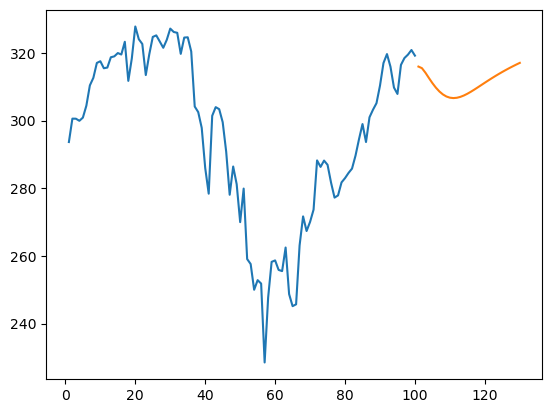

In [28]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')